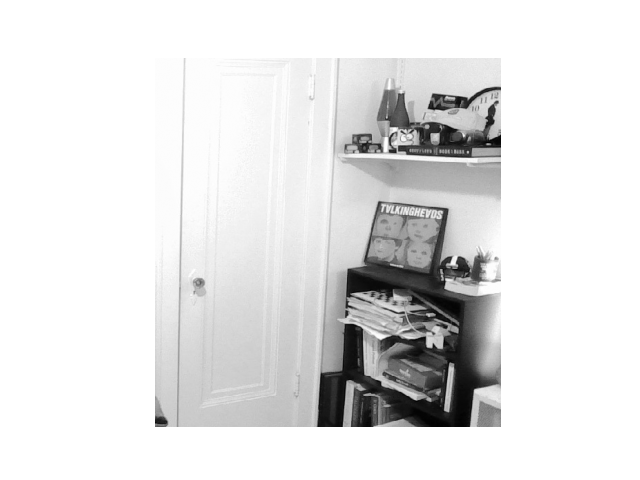

Clicked: (280, 306)
Clicked: (442, 351)
Clicked: (429, 523)
Clicked: (271, 452)


In [16]:
%matplotlib widget
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


clicked_pts = []

def onclick(event):
    if event.inaxes:
        x, y = int(event.xdata), int(event.ydata)
        clicked_pts.append((x,y))
        print(f"Clicked: ({x}, {y})")

# Load the image
img = mpimg.imread('./image.jpg')
if img.ndim == 3:
    img = img.mean(axis=2)

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.set_axis_off()
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [17]:
clicked_pts

[(280, 306), (442, 351), (429, 523), (271, 452)]

In [18]:
import numpy as np

pts_src = np.array(clicked_pts)

pts_dst = np.array([
    (200, 200),
    (250, 200),
    (250, 250),
    (200, 250)
])

In [19]:
H, ret = cv.findHomography(srcPoints=pts_src, dstPoints=pts_dst)

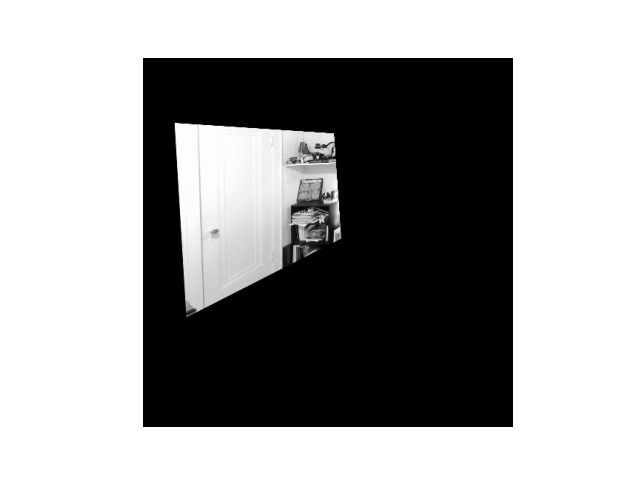

In [20]:
img_dst = cv.warpPerspective(img, H, (500, 500))
plt.imshow(img_dst, 'gray')
plt.show()